# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:03:36.845410: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:03:40.480090
2025-04-14 20:03:40.480090


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 6
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:03:34"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

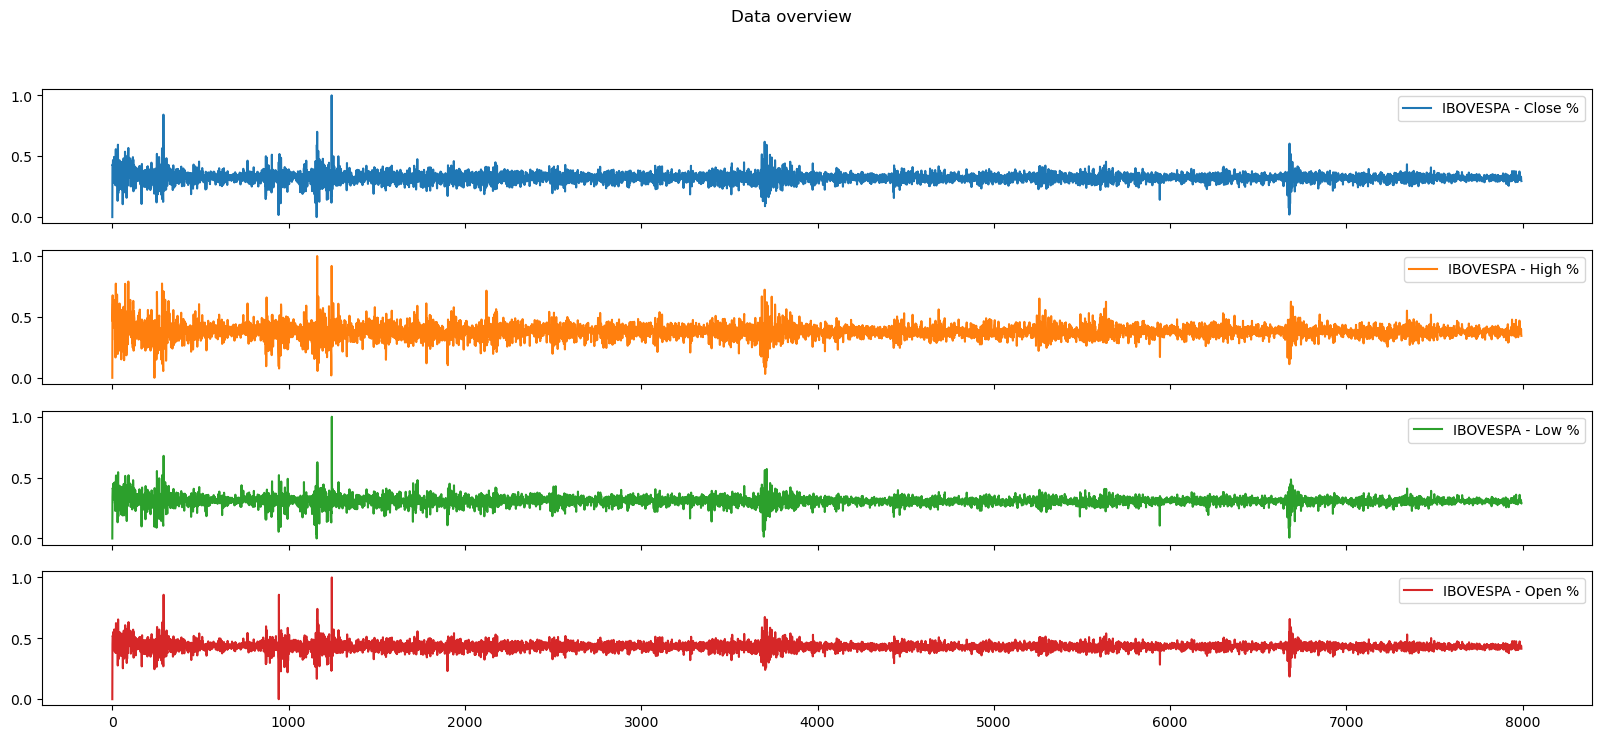

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

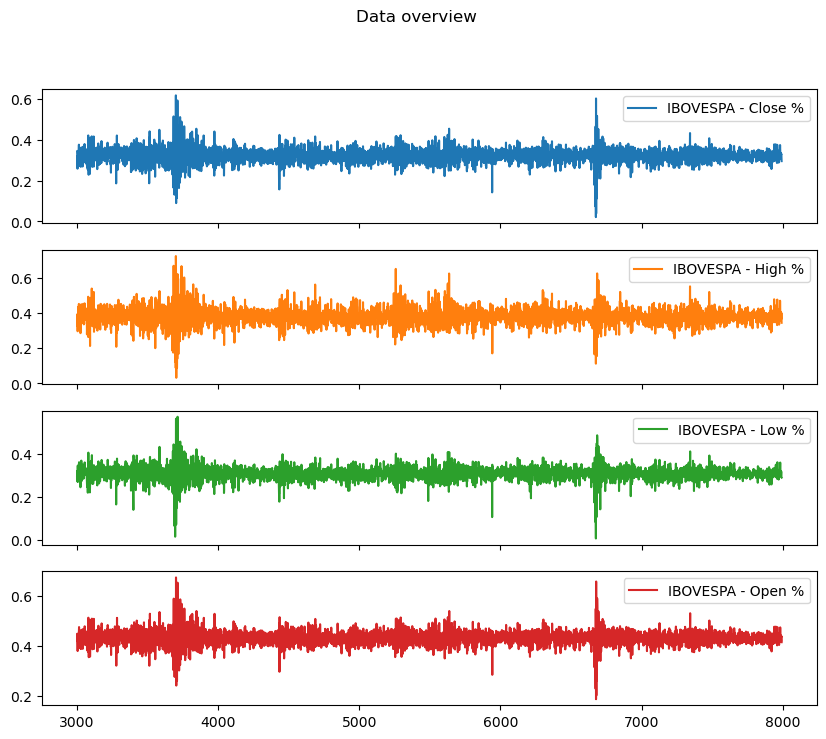

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

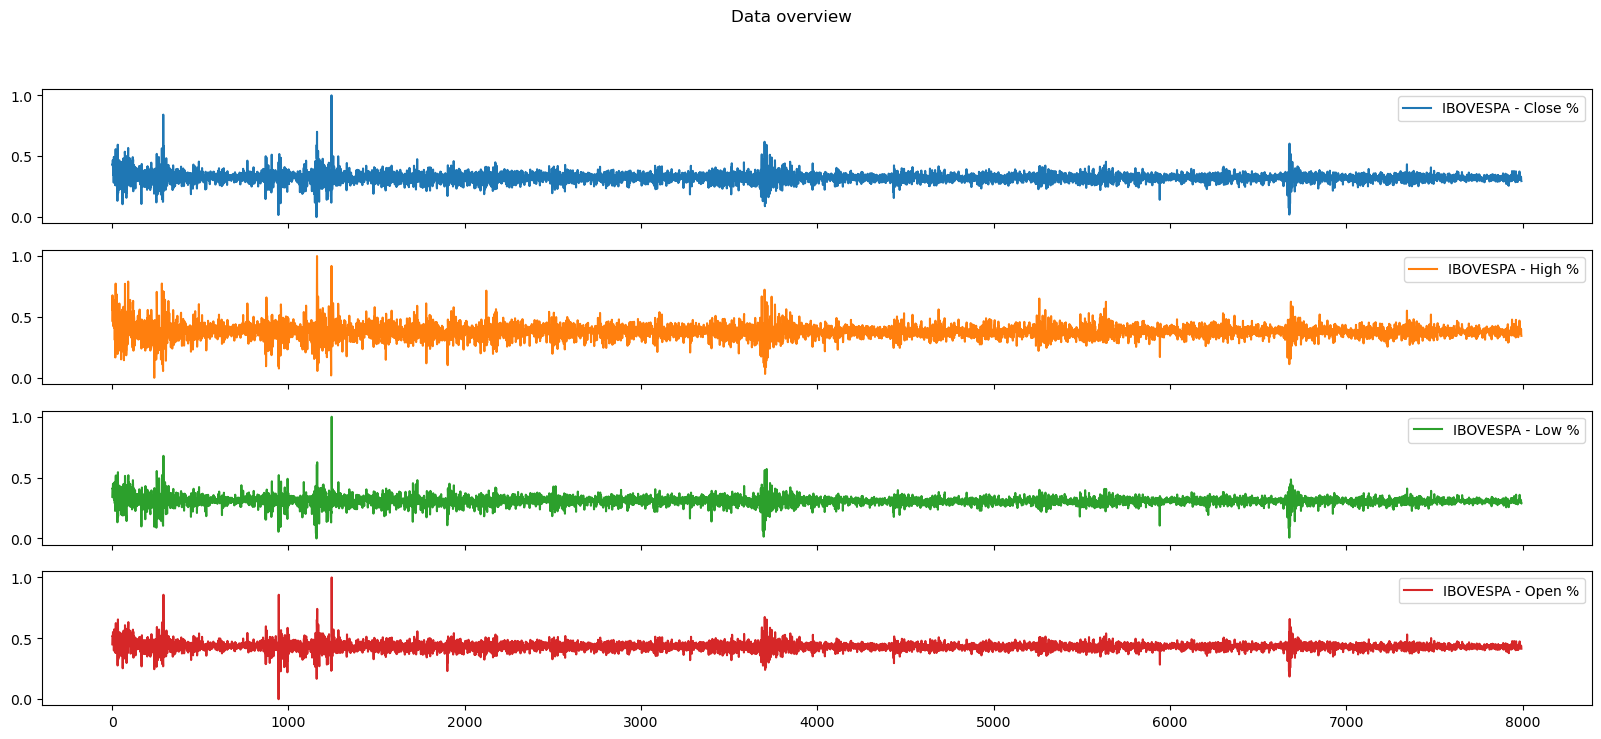

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close %']

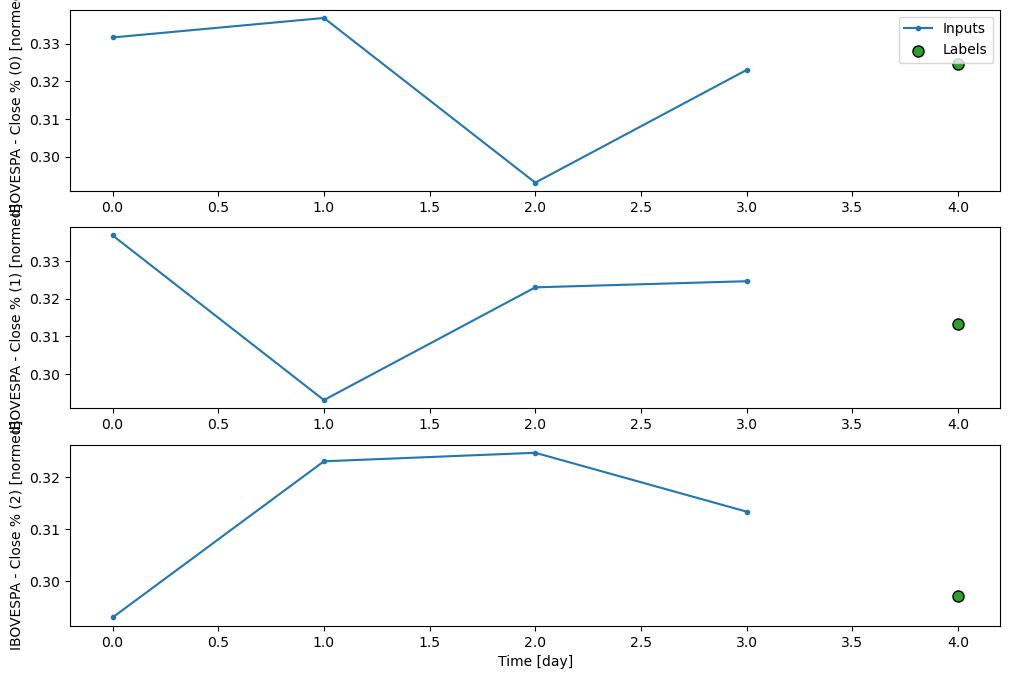

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10:16 3s/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3872

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 71.3009 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2860   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 60.6900 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2481

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 52.9392 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2219

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 6547.1958 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2035

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 46877.3711 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1901

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 69458.5781 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1781

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 80076.7422 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1693

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 85820.2891 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1619

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 88742.1953 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1554

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 90023.8047 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1492

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 90098.5859 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1442

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 89450.7812 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1393

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 88457.7812 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1354

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 87225.6797 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1320

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 85847.9141 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1288

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 84386.9375 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1258

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 83388.1406 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1240

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 82380.3203 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1222

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 80866.3516 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1198

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 79198.7266 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1172

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 78211.8750 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1158

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 76756.9688 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1137

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 75337.1094 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1118

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 74107.1641 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1102

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 73205.4609 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1090

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 72321.9062 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1079

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 71172.2656 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1065

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 70056.5000 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1051 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9883 - val_mean_squared_error: 2.6218e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 23.5479 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1082

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 23.8754 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0936 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 22.3371 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 20.2895 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0814

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 7189.4565 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 51685.5547 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 74805.9219 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0743

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 87336.8203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 94134.2109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 97879.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99227.0938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 99378.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 98764.4375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 97707.5625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 96372.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 94867.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 93263.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 91610.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 89754.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 88092.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 86271.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 84666.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 83100.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 81576.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 80097.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 78820.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 77276.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8302 - val_mean_squared_error: 2.5023e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 23.5841 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1106

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 23.7723 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0949 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.3430 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.1188 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0813

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 13473.4785 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 56773.5352 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 76432.8906 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 87128.8047 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0729

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 92895.4062 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 95793.3516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96954.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 96997.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 96237.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 95133.7969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 93785.6406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 92289.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 90709.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 89089.0781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 87277.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 85657.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 83886.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 82327.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 80641.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 79167.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 77737.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 76352.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 75454.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 4.0789 - val_mean_squared_error: 2.8912e-04 - val_root_mean_squared_error: 0.0170 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 24.0569 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1139

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 23.6826 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.0245 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 19.9092 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0811

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 20113.1875 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 61705.3789 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 80709.2891 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 91867.4922 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 96618.7109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 99166.1094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100368.2734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 100412.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 99731.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658 

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 98483.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 97087.7344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 95360.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 93718.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 91850.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 90162.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 88488.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 86840.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 85049.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 83308.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 81788.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 80152.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 78728.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 78111.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 4.0896 - val_mean_squared_error: 2.9028e-04 - val_root_mean_squared_error: 0.0170 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 24.1216 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1141

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 23.4334 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 21.6630 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0879

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.0134 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0824

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.1429 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 40171.7852 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 66448.9844 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 82901.2656 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91869.9922 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 96635.2812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99064.8125 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 99700.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 99496.5078 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 98819.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 97826.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 96624.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 95115.7031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 93507.9375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 91850.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 89989.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 88323.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 86678.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 85599.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 84711.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 83663.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 82633.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 81291.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 79983.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 78712.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 77478.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 3.9859 - val_mean_squared_error: 2.7509e-04 - val_root_mean_squared_error: 0.0166 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 24.0196 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1136

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 23.1516 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 21.9567 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.2498 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 19.0540 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 20456.4688 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0767

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 56575.5195 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 74933.8281 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 85008.2031 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 93439.3125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0714

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 98697.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101262.6016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0686

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 102185.0859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0672

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 102082.2344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 101330.8594 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 100168.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 98749.1172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 97711.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 96809.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 95321.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 93613.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 91896.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 90568.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 89627.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 88326.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 86684.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 85084.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0575

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 84041.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 83187.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 81851.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 80393.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 79448.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8968 - val_mean_squared_error: 2.6147e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 23.8736 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1128

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.1228 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 21.4577 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0881

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 19.8018 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0824

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 18.9800 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 7396.9102 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 36618.1211 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 56627.0586 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 78824.4375 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 90881.1172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 97403.4531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100722.1953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 102108.6406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 102296.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 101729.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 100816.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 99334.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 97800.4141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 96158.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 94270.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0609

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 92552.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 90650.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 88962.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 87307.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 85690.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 83945.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 82423.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 80786.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 79520.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8659 - val_mean_squared_error: 2.5680e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 23.8094 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1124

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.1091 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0953 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.2248 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.2260 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 20605.5469 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 60213.1094 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 81064.2344 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 90445.7500 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 96904.9922 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100515.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102457.2812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 102980.1953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 102948.8594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 102632.8672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 101716.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 100445.2969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 98953.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 97515.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 96395.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 95254.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0610

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 94103.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 92374.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 90658.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 89156.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 87680.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 86415.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 84654.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83117.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 81463.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80027.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8875 - val_mean_squared_error: 2.6003e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 23.8977 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1128

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.2155 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0954 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 21.6249 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0881

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 19.5633 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0811

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.8569 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 45755.6133 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 71004.2500 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 86870.8281 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 96186.3359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100416.7656 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102356.3750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 102886.5234 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 102531.7891 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0657

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 101616.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 100346.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 98856.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 97235.0078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 95922.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 94203.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0608

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 92283.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 90569.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 89254.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 88327.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 87594.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 85974.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 84397.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 82867.3906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 81383.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 79948.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8432 - val_mean_squared_error: 2.5314e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 23.7713 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1121

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.0271 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0954 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.4547 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.3990 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0807

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14415.9219 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 57498.0000 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 80036.8906 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 92279.0703 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 98901.7578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102507.7578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 103750.4844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 103837.8906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 103195.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 102091.7031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 100696.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 99123.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97448.3828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 95527.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 93782.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 91853.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90142.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88465.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 86829.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85063.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83522.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 81866.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80743.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8434 - val_mean_squared_error: 2.5320e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 23.7779 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1121

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 23.0899 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 21.6913 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0886

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 20.7246 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0852

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 19.5815 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0814

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 18.8925 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 14377.8330 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 50115.8789 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 66435.1328 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 77955.2031 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 86165.9844 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91013.9609 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 93880.1406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 96211.7188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 97513.7891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99610.3750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101741.9297 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 102966.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 103576.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 103618.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 103415.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0656

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 102923.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0649

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102228.0703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101231.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 100263.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99221.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 97942.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0618

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 96620.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 95274.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 93920.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 92569.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 91419.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 90092.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 88970.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 88231.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 87139.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 86065.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 85011.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84492.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83639.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 82634.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 81975.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80530.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8593 - val_mean_squared_error: 2.5587e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 23.8393 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1125

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 22.9294 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0957 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.5035 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 20.8423 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.2478 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0798

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 7516.1958 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 32155.9766 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0761

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 57541.4609 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 78220.9141 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 89055.1875 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 96539.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 100383.1562 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102585.1562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 103671.6797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 103980.3672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 103874.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 103273.8984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 102444.4297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 101262.5312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 100090.0078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 99016.3906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623 

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 97711.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0617

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 96372.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 95017.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 93659.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 92114.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 90777.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 90210.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 88901.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 87435.9688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 86181.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 84953.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 84265.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 83417.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83082.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 82584.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 81765.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80804.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8390 - val_mean_squared_error: 2.5105e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:23s:656ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.021894998848438263 - MSE: 0.0007430388359352946 - MAPE: 7.037374496459961 - RMSE: 0.0272587388753891


2025-04-14 20:04:10.767107: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 6,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:03:34',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:0m:23s:656ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.021894998848438263,
   'MSE': 0.0007430388359352946,
   'MAPE': 7.037374496459961,
   'RMSE': 0.0272587388753891}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:04:11.017767: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.01891194097697735 - MSE: 0.00047591369366273284 - MAPE: 5.887756824493408 - RMSE: 0.021815447136759758


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 23.7154 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1118

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 22.9551 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0972   

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 22.7921 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0944

 13/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 22.4640 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.0687 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0876

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 19.4262 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0819

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 18.6926 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.3092 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 14119.4805 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 36416.6523 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 52893.2305 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 65241.5078 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 56/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 78391.0625 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 62/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 87158.0859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95145.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98244.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98997.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 101116.4062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 101773.0156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 101422.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0650

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 100391.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 98461.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626  

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 96182.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 93563.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 90906.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 88288.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 85750.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 83314.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 80986.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 79083.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550


Loss: 0.028652694076299667 - MAE: 0.028652694076299667 - MSE: 0.0018347682198509574 - MAPE: 42317.21875 - RMSE: 0.042834196239709854


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 4.9330 - mean_squared_error: 4.5691e-04 - root_mean_squared_error: 0.0214

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 4.0595 - mean_squared_error: 2.9470e-04 - root_mean_squared_error: 0.0171 


Loss: 0.01240610796958208 - MAE: 0.01240610796958208 - MSE: 0.00025105284294113517 - MAPE: 3.8389716148376465 - RMSE: 0.015844646841287613


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 2.9146 - mean_squared_error: 1.7152e-04 - root_mean_squared_error: 0.0131

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 4.3148 - mean_squared_error: 3.6695e-04 - root_mean_squared_error: 0.0189


Loss: 0.014972254633903503 - MAE: 0.014972254633903503 - MSE: 0.0004205770674161613 - MAPE: 4.706995964050293 - RMSE: 0.020507976412773132


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

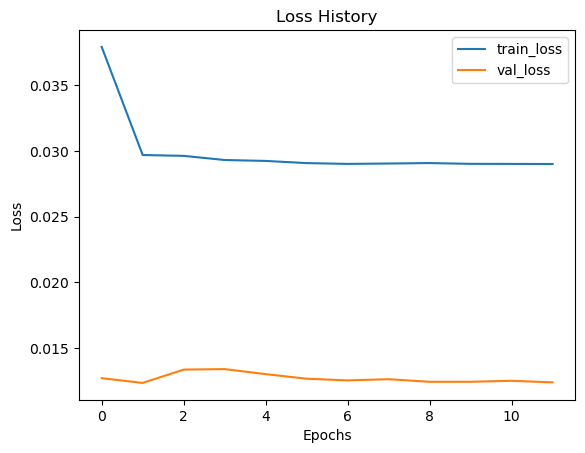

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

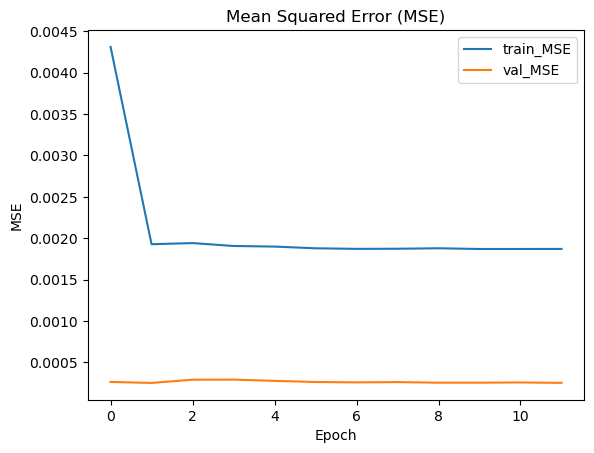

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

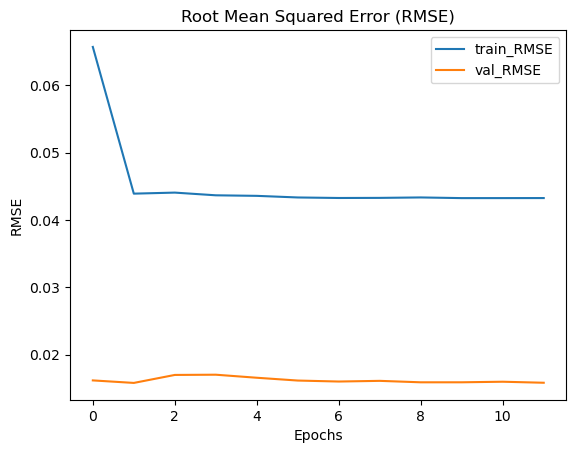

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

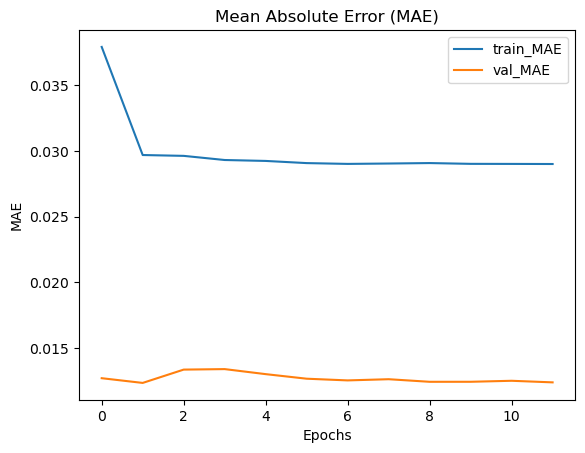

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

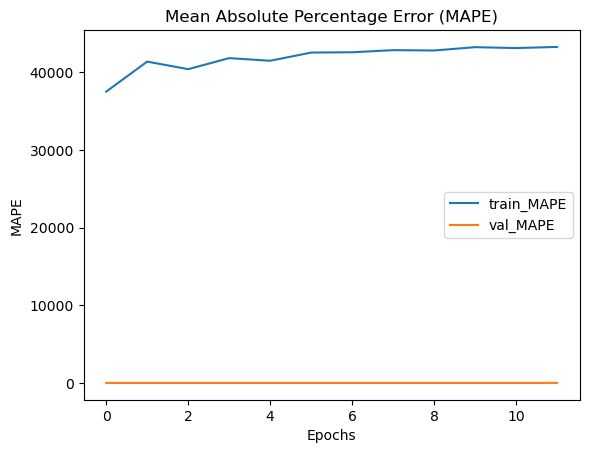

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:04:15.653766: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 4)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


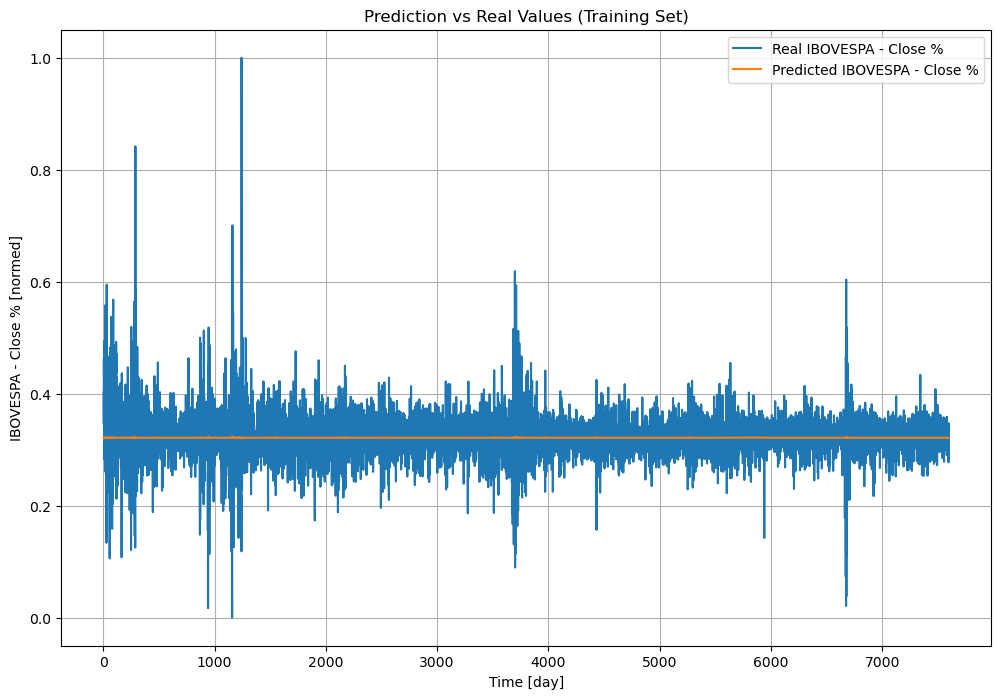

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


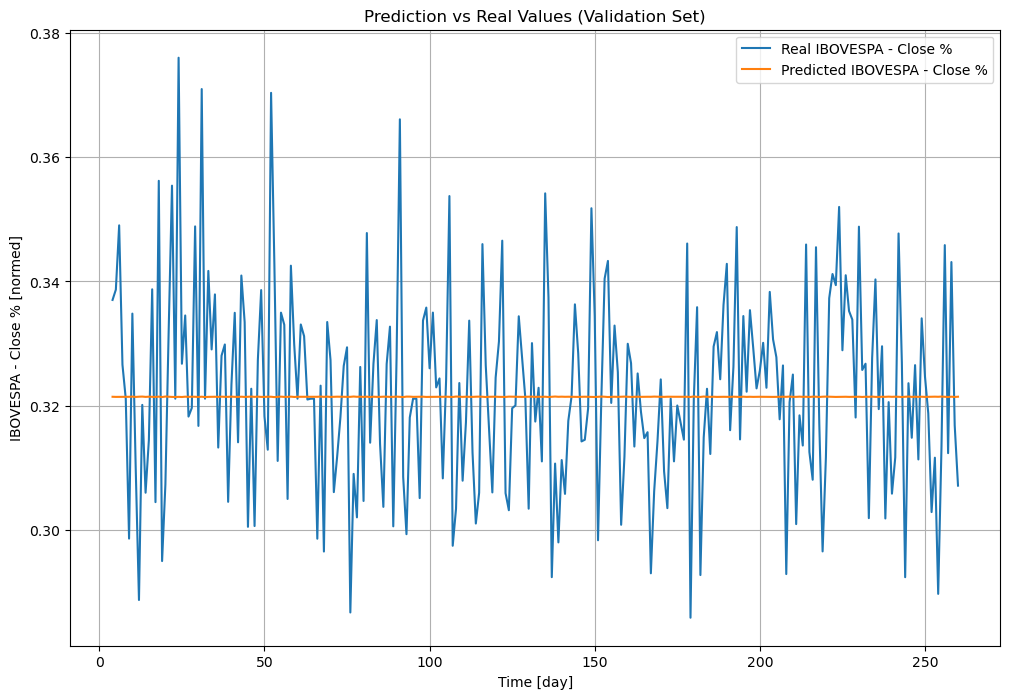

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


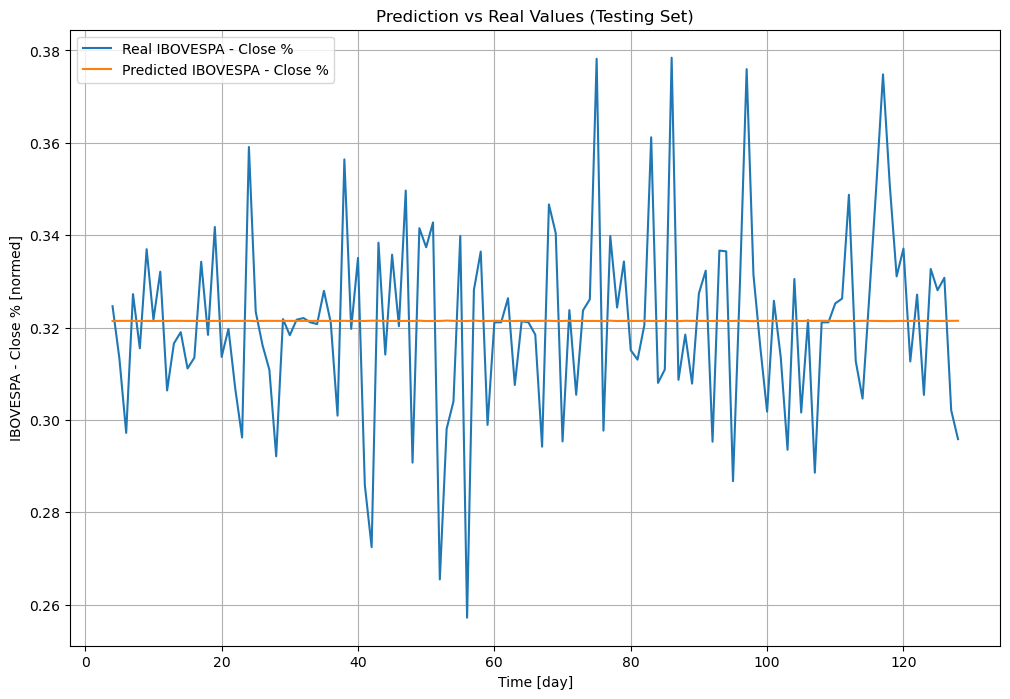

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

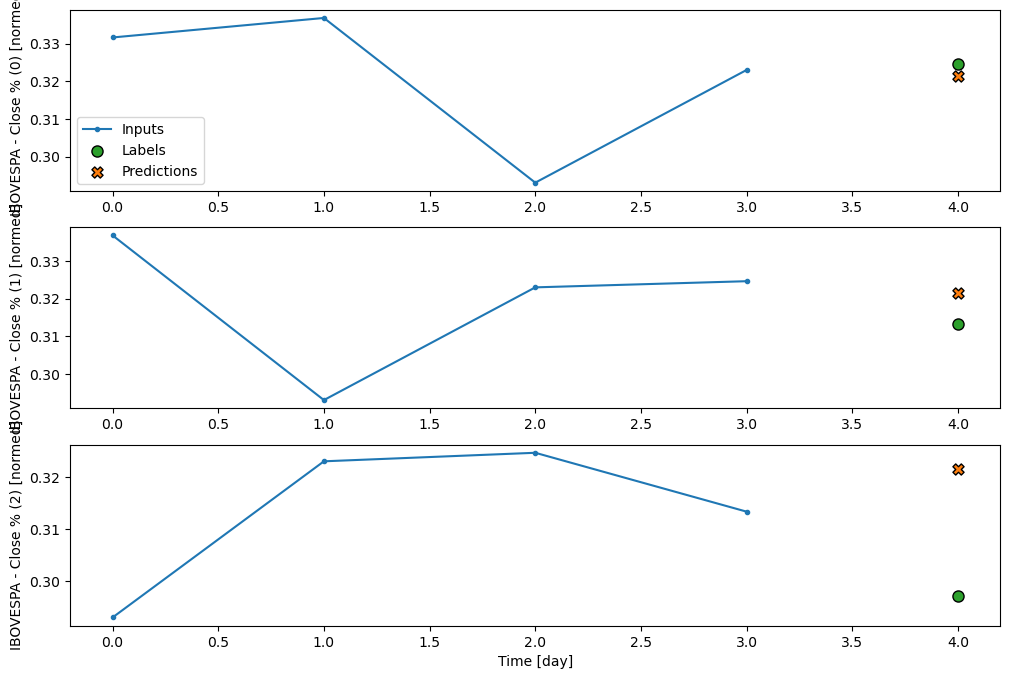

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:37s:964ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[[0.32142976, 0.32142976, 0.32142976, ..., 0.32142976,
         0.32142976, 0.32142976]],

       [[0.32143435, 0.32143435, 0.32143435, ..., 0.32143435,
         0.32143435, 0.32143435]],

       [[0.32145426, 0.32145426, 0.32145426, ..., 0.32145426,
         0.32145426, 0.32145426]],

       ...,

       [[0.32143825, 0.32143825, 0.32143825, ..., 0.32143825,
         0.32143825, 0.32143825]],

       [[0.32143578, 0.32143578, 0.32143578, ..., 0.32143578,
         0.32143578, 0.32143578]],

       [[0.32147136, 0.32147136, 0.32147136, ..., 0.32147136,
         0.32147136, 0.32147136]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')